In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.feature import hog # For Histogram of Oriented Gradients
from skimage.exposure import rescale_intensity # For HOG visualization
from skimage import exposure
import cv2 # OpenCV for some techniques like Canny

In [82]:
df = pd.read_csv('train.csv')
df_result = pd.read_csv('test.csv')
print("Dataset loaded successfully.")
print(f"Shape of the loaded DataFrame: {df.shape}")
print(f"Shape of the result DataFrame: {df_result.shape}")

Dataset loaded successfully.
Shape of the loaded DataFrame: (42000, 785)
Shape of the result DataFrame: (28000, 784)


Label column name: label
Labels shape: (42000,)
Flattened images shape: (42000, 784)
Reshaped images shape: (42000, 28, 28)
Test Flattened images shape: (28000, 784)

Plotting a sample of separated images:


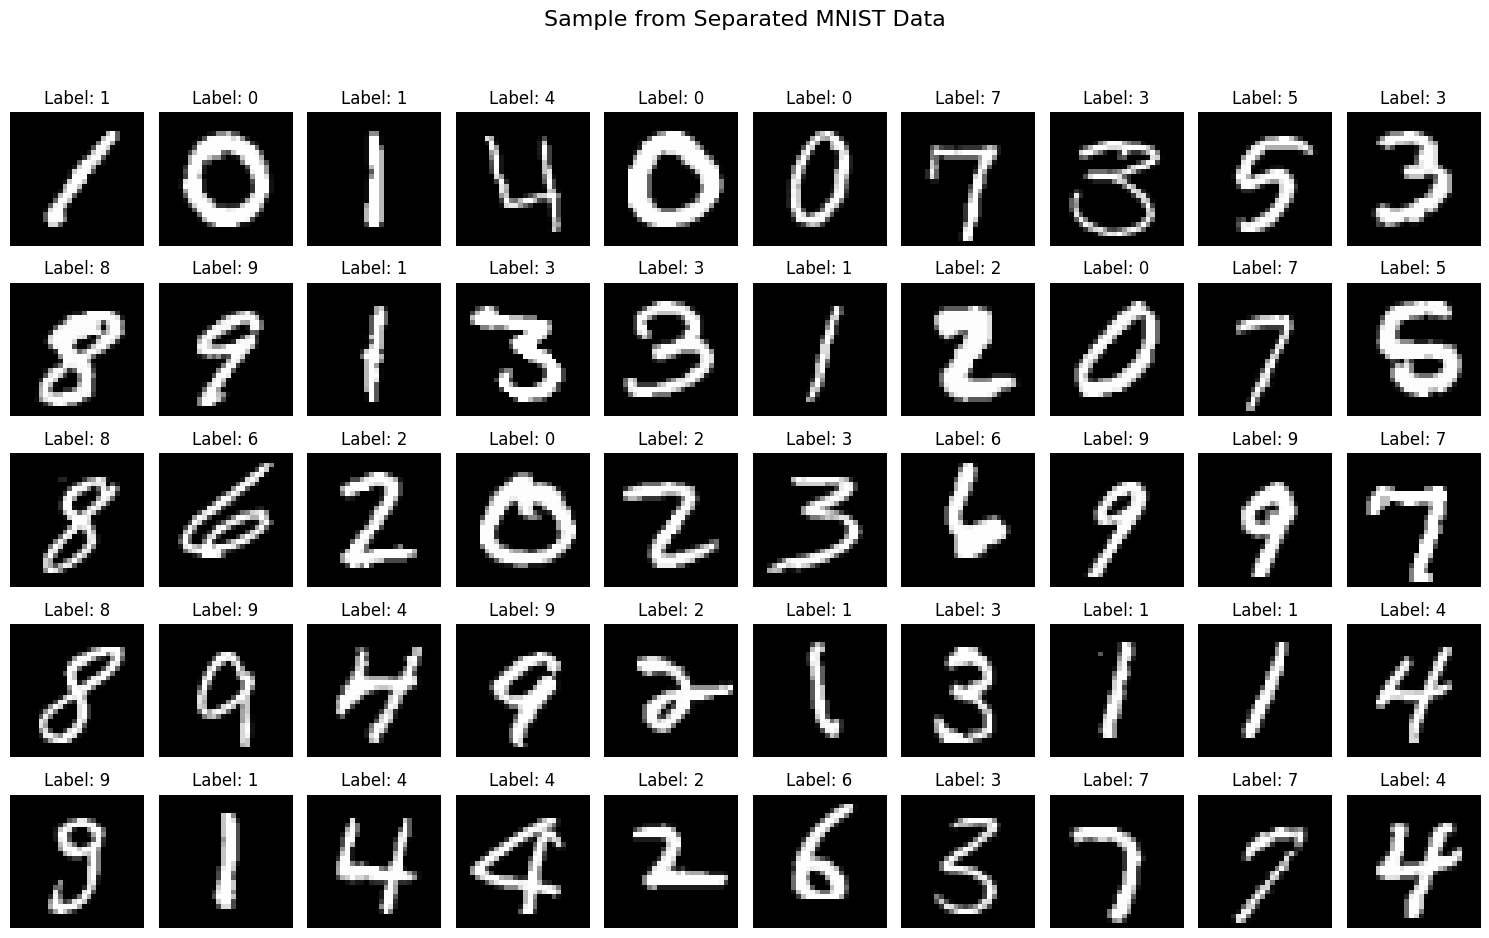

In [83]:
# Loading the Dataset

label_column_name = df.columns[0]
print(f"Label column name: {label_column_name}")
labels = df[label_column_name].values
print(f"Labels shape: {labels.shape}")
images_flat = df.drop(columns=[label_column_name]).values
print(f"Flattened images shape: {images_flat.shape}")
num_images = images_flat.shape[0]
images = images_flat.reshape(num_images, 28, 28)
print(f"Reshaped images shape: {images.shape}")

# Load the final training set

result_num_images = df_result.shape[0]
test_result_images = df_result.values
print(f"Test Flattened images shape: {test_result_images.shape}")

# Visualiz the Data

def plot_mnist_grid(images, labels, num_rows=5, num_cols=10, title="Sample from Separated MNIST Data"):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5 * num_cols, 2 * num_rows))
    axes = axes.flatten()

    num_to_plot = min(num_rows * num_cols, len(images))
    for i in range(num_to_plot):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\nPlotting a sample of separated images:")
plot_mnist_grid(images, labels)



--- Applying Canny Edge Detection ---


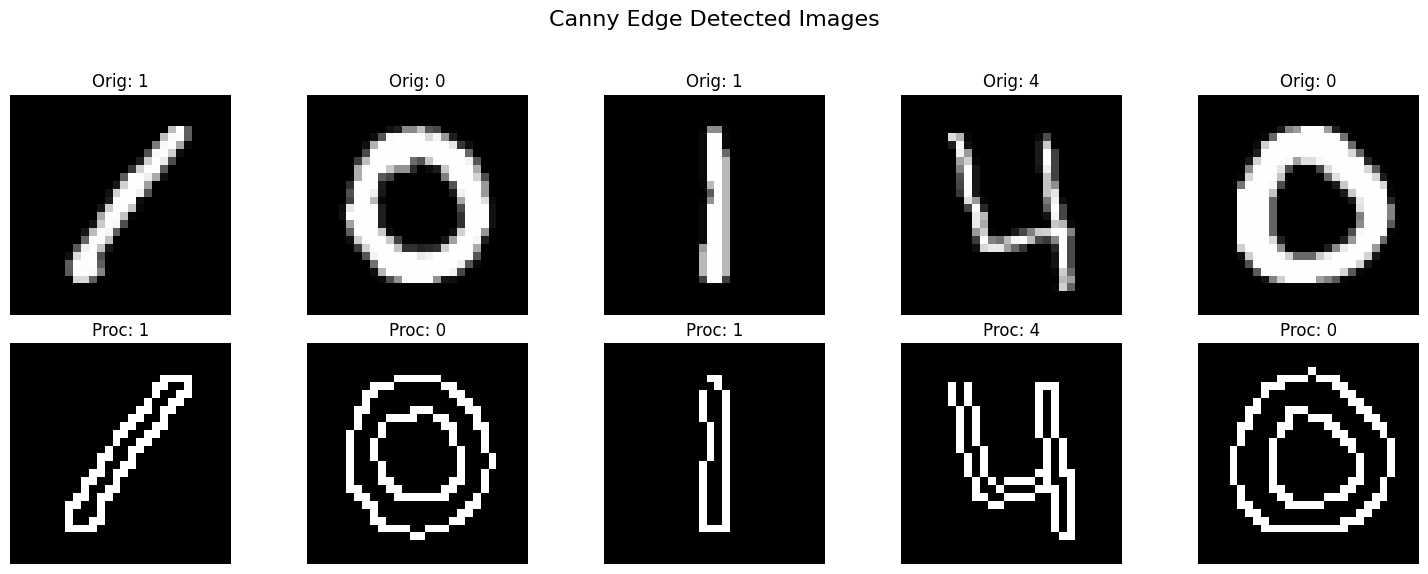

In [87]:
# --- Edge Detection (Canny) ---
print("\n--- Applying Canny Edge Detection ---")
# Step 1: Ensure the image is 2D and of type np.uint8 for Canny
X_edges = np.zeros_like(images, dtype=np.uint8)

for i in range(images.shape[0]):
    img_uint8 = images[i].astype(np.uint8)
    X_edges[i] = cv2.Canny(img_uint8, threshold1=50,threshold2=150)

plot_processed_images(images, X_edges, labels, title="Canny Edge Detected Images")


In [90]:
# Normalize raw pixels for baseline model (0-1 range)
images_normalized_flat = images_flat.reshape(-1, 784).astype('float32') / 255.0

# Split data for baseline
X_train_baseline, X_test_baseline, y_train, y_test = train_test_split(
    images_normalized_flat, labels, test_size=0.2, random_state=42)

print(f"Original image data shape: {images_flat.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Baseline training data shape: {X_train_baseline.shape}")
print(f"Baseline test data shape: {X_test_baseline.shape}")


# --- Baseline Logistic Regression Model ---
print("\n--- Training Baseline Logistic Regression ---")
logistic_regression_baseline = LogisticRegression(max_iter=1000)
logistic_regression_baseline.fit(X_train_baseline, y_train)

# Set up K-Fold Cross-Validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# # Perform cross-validation
# cv_scores = cross_val_score(logistic_regression_baseline,X_train_baseline,y_train,cv=cv)
# print(f"\nCross-validation scores (accuracy for each fold): {cv_scores}")
y_pred_baseline = logistic_regression_baseline.predict(X_test_baseline)
print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print("Baseline Classification Report:\n", classification_report(y_test, y_pred_baseline))

# Store results for comparison
results = {'Baseline': accuracy_score(y_test, y_pred_baseline)}

result_pred_baseline = logistic_regression_baseline.predict(test_result_images)
print(test_result_images.shape)
print(result_pred_baseline.shape)

Original image data shape: (42000, 784)
Labels shape: (42000,)
Baseline training data shape: (33600, 784)
Baseline test data shape: (8400, 784)

--- Training Baseline Logistic Regression ---
Baseline Accuracy: 0.9192
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.90      0.87      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.93       893
           8       0.90      0.89      0.89       835
           9       0.91      0.90      0.91       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92   


Plotting a sample of test images:


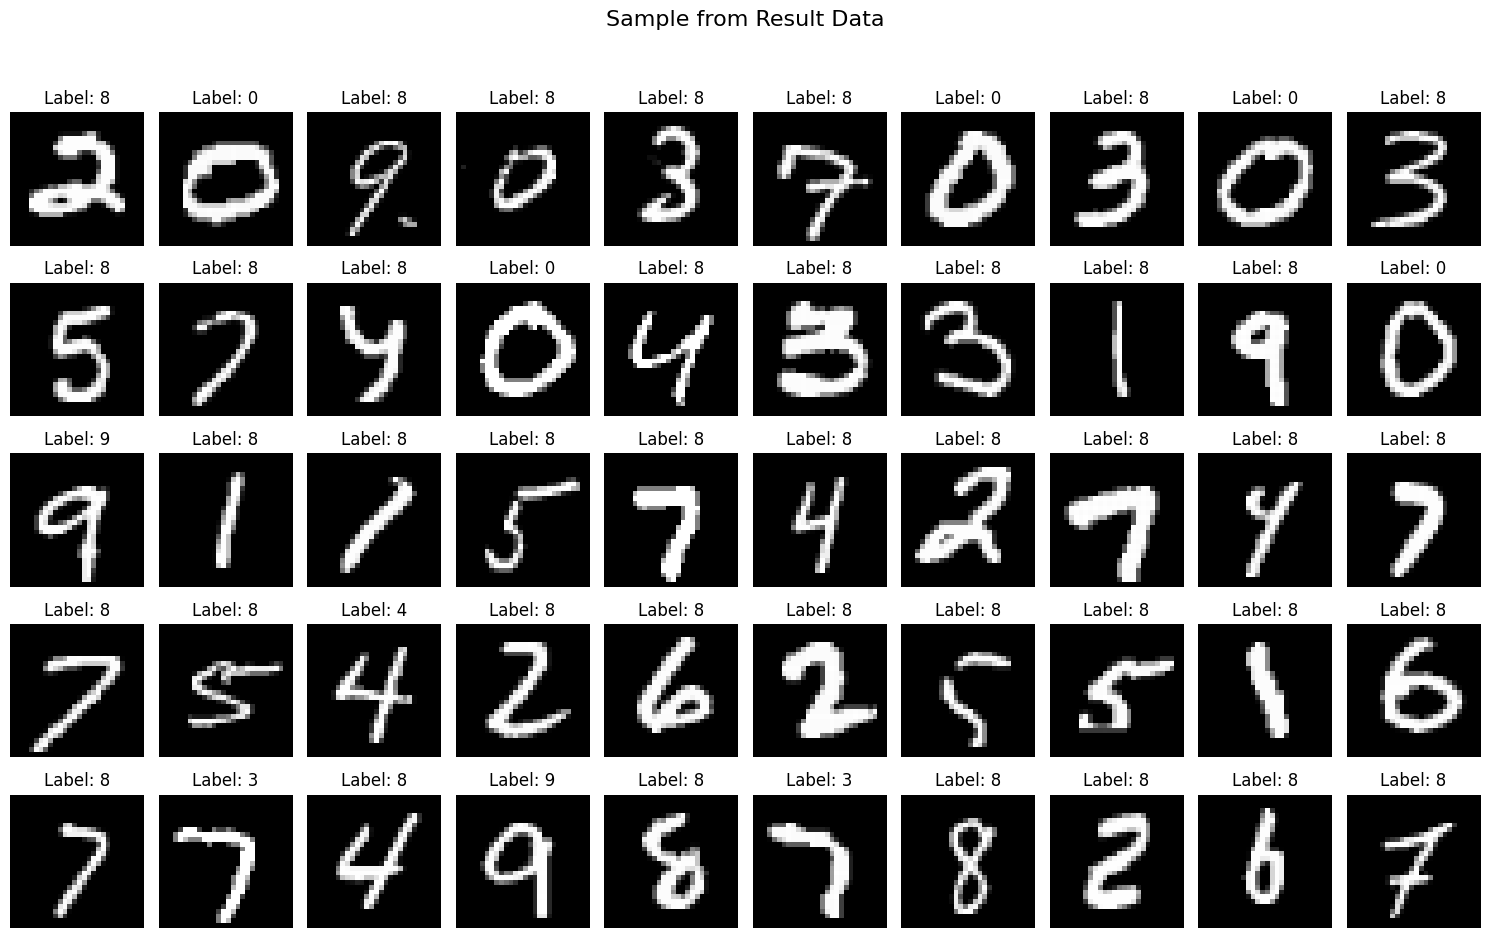

In [89]:
print("\nPlotting a sample of test images:")
n_images = test_result_images.shape[0]
test_images = test_result_images.reshape(n_images,28,28)
plot_mnist_grid(test_images, result_pred_baseline,title="Sample from Result Data")